### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [21]:
df = pd.read_csv('data/coupons.csv')
pd.set_option('display.max_columns', None)

In [22]:
df.sample(5)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
5825,Work,Alone,Sunny,80,7AM,Coffee House,2h,Male,31,Married partner,1,Bachelors degree,Architecture & Engineering,$87500 - $99999,NaN,less1,less1,4~8,less1,less1,1,1,0,1,0,1
2675,No Urgent Place,Partner,Sunny,80,10AM,Coffee House,2h,Male,41,Divorced,1,Some college - no degree,Transportation & Material Moving,$50000 - $62499,NaN,less1,less1,1~3,1~3,1~3,1,0,0,0,1,1
9393,Home,Alone,Rainy,55,6PM,Bar,1d,Male,21,Single,0,Bachelors degree,Unemployed,$100000 or More,NaN,4~8,less1,1~3,4~8,1~3,1,1,1,0,1,1
8640,Home,Alone,Sunny,30,6PM,Carry out & Take away,2h,Female,26,Married partner,0,Bachelors degree,Unemployed,$87500 - $99999,NaN,1~3,less1,NaN,less1,less1,1,1,0,1,0,1
6496,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,36,Unmarried partner,1,Bachelors degree,Retired,$37500 - $49999,NaN,1~3,4~8,4~8,1~3,1~3,1,1,0,0,1,1


2. Investigate the dataset for missing or problematic data.  
   
   - One thing we note is that ALL columns are categorical.  For instance, even temperature only has 3 temperature
   values.  So these are clearly categorical.  This means that our visualizations will probably be bar plots, histograms, heatmaps, box/violin plots 
   
   - Let us start by dropping duplicates and then running the info.() method

In [23]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12503 non-null

Next we will calculate the percentage of nulls 

In [24]:
def print_null_ratio(df, col):
    sum_count = df[col].isnull().sum()
    print(f'{col} has {sum_count} nulls or {round((sum_count/df.shape[0])*100,2)} % nulls')

print_null_ratio(df, 'car')
print_null_ratio(df, 'Bar')
print_null_ratio(df, 'CoffeeHouse')
print_null_ratio(df, 'CarryAway')
print_null_ratio(df, 'RestaurantLessThan20')
print_null_ratio(df, 'Restaurant20To50')

car has 12502 nulls or 99.14 % nulls
Bar has 107 nulls or 0.85 % nulls
CoffeeHouse has 217 nulls or 1.72 % nulls
CarryAway has 150 nulls or 1.19 % nulls
RestaurantLessThan20 has 129 nulls or 1.02 % nulls
Restaurant20To50 has 189 nulls or 1.5 % nulls


3. Decide what to do about your missing data -- drop, replace, other...

    a. car has 99% nulls --> We will drop this column
    b. All other columns mentioned above only have 1-2% nulls.  What are our options? 
        i. Option 1: Delete rows with nulls.  
            --> This would be a shame as we have potentially up to 6% of rows that contain nulls 
        ii. Option 2: Fill nulls with random values or with most common value. 
            --> This could work well but might introduce bias 
        iii. Option 3: Fill with 'Unknown' values.  
            --> This seems like a good approach as we neither lose any data nor introduce bias 

In [25]:
#drop car column
df.drop(['car'],axis=1, inplace=True)

#fill nulls with value 'Unknown'
df.fillna('Unknown', axis=1, inplace=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12610 entries, 0 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  object
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  object
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  Bar                   12610 non-null  object
 15  CoffeeHouse           12610 non-null

4. What proportion of the total observations chose to accept the coupon? 



In [46]:
def print_ratio_in_binary_column(df, col, msg):
    ones=df.groupby(col)[col].value_counts().sort_values(ascending=False).values[0]
    print(ones)
    print(f'{round((ones/df.shape[0])*100,2)} % {msg}')

print_ratio_in_binary_column(df, 'Y', ' of total observations chose to accept the coupon.')

#print(df.groupby('Y')[['Y']].value_counts().sort_values(ascending=False))

7157
56.76 %  of total observations chose to accept the coupon.


5. Use a bar plot to visualize the `coupon` column.

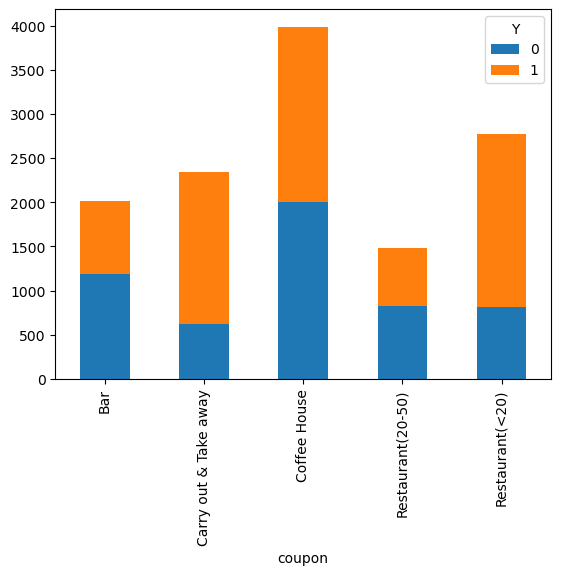

In [88]:
# Group by 'coupon' and 'Y', and get the size of each group
grouped = df.groupby(['coupon', 'Y']).size().unstack()
grouped

# Plot
grouped.plot(kind='bar', stacked=True)
plt.show()

In [89]:
grouped

Y,0,1
coupon,,
Bar,1186,824
Carry out & Take away,624,1720
Coffee House,2000,1989
Restaurant(20-50),831,657
Restaurant(<20),812,1967


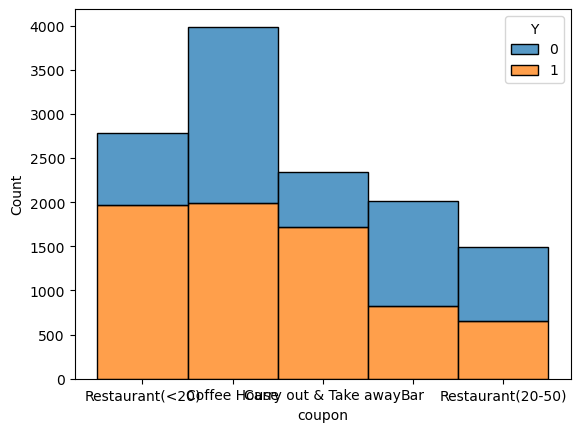

In [66]:
sns.histplot(data=df, x="coupon", hue="Y", multiple="stack")
plt.show()

In [98]:
grouped = df.groupby(['coupon', 'Y']).size().unstack()

#Calculate the total by row/horizontally (i.e. by coupon)
grouped['total'] = grouped.sum(axis=1)
percentages = grouped.div(grouped['total'], axis=0)
percentages

Y,0,1,total
coupon,,,
Bar,0.590050,0.409950,1.0
Carry out & Take away,0.266212,0.733788,1.0
Coffee House,0.501379,0.498621,1.0
Restaurant(20-50),0.558468,0.441532,1.0
Restaurant(<20),0.292191,0.707809,1.0


Y
0    5453
1    7157
dtype: int64


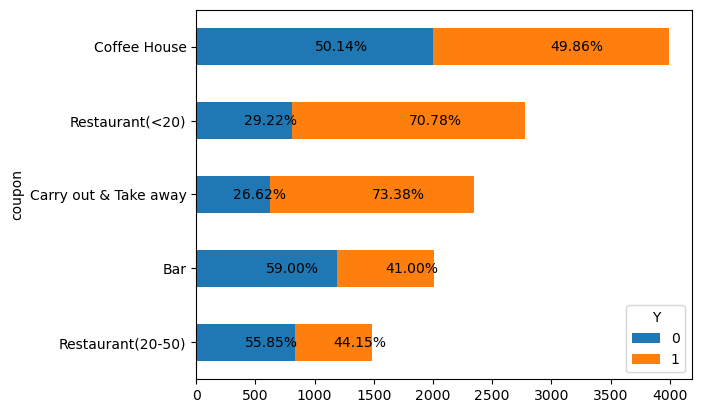

In [90]:
import matplotlib.pyplot as plt

# Group by 'coupon' and 'Y', and get the size of each group
grouped = df.groupby(['coupon', 'Y']).size().unstack()

#Calculate the total by row/horizontally (i.e. by coupon)
grouped['total'] = grouped.sum(axis=1)

# Calculate percentages
#divide each element in a column/vertically (i.e. by value of Y)  by the total
percentages = grouped.div(grouped['total'], axis=0)

# Add total column, sort by total, then drop total
grouped = grouped.sort_values('total')
grouped = grouped.drop(columns='total')

# Sort percentages in the same order
percentages = percentages.loc[grouped.index]

# Plot
ax = grouped.plot(kind='barh', stacked=True)

# Add percentages on bars
for i in range(len(grouped.index)):
    for j in range(len(grouped.columns)):
        value = grouped.iloc[i, j]
        percentage = percentages.iloc[i, j]
        ax.text(value/2 if j == 0 else grouped.iloc[i, :j+1].sum() - value/2, i, 
                '{:.2f}%'.format(percentage * 100), va='center')

#plt.show()

In [102]:
grouped_counts = df.groupby(['coupon', 'Y']).size().unstack().reset_index()
#grouped_counts
grouped_counts.iloc[:, 1:]

Y,0,1
0,1186,824
1,624,1720
2,2000,1989
3,831,657
4,812,1967


In [80]:
import plotly.graph_objects as go

# Group by 'coupon' and 'Y', and get the size of each group
grouped_counts = df.groupby(['coupon', 'Y']).size().unstack().reset_index()

# Calculate percentages
grouped_percentages = grouped_counts.copy()
for col in grouped_counts.columns[1:]:
    grouped_percentages[col] = 100 * grouped_counts[col] / grouped_counts.iloc[:, 1:].sum(axis=1)

# Order rows from least to greatest based on total count
grouped_counts['total'] = grouped_counts.iloc[:, 1:].sum(axis=1)
grouped_counts = grouped_counts.sort_values(by='total')
grouped_percentages = grouped_percentages.loc[grouped_counts.index]

# Prepare data for plot
data = []
for col in grouped_counts.columns[1:-1]:  # exclude 'total' column
    data.append(go.Bar(name=col, y=grouped_counts['coupon'], x=grouped_counts[col], 
                       text=grouped_percentages[col].apply('{:.2f}%'.format), textposition='auto', orientation='h'))

# Plot
fig = go.Figure(data)
fig.update_layout(barmode='stack')
fig.show()


In [86]:
grouped_counts = df.groupby(['coupon', 'Y']).size()
#print(type(grouped_counts))
print(grouped_counts)
print(grouped_counts.unstack())
#gropue.unstack().reset_index()
print(grouped_counts.unstack().reset_index())

coupon                 Y
Bar                    0    1186
                       1     824
Carry out & Take away  0     624
                       1    1720
Coffee House           0    2000
                       1    1989
Restaurant(20-50)      0     831
                       1     657
Restaurant(<20)        0     812
                       1    1967
dtype: int64
Y                         0     1
coupon                           
Bar                    1186   824
Carry out & Take away   624  1720
Coffee House           2000  1989
Restaurant(20-50)       831   657
Restaurant(<20)         812  1967
Y                 coupon     0     1
0                    Bar  1186   824
1  Carry out & Take away   624  1720
2           Coffee House  2000  1989
3      Restaurant(20-50)   831   657
4        Restaurant(<20)   812  1967


6. Use a histogram to visualize the temperature column.

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


2. What proportion of bar coupons were accepted?


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [ ]:

import plotly.graph_objects as go
from plotly.subplots import make_subplots
#Custom Binning 

x = ['1970-01-01', '1970-01-01', '1970-02-01', '1970-04-01', '1970-01-02',
     '1972-01-31', '1970-02-13', '1971-04-19']

fig = make_subplots(rows=3, cols=2)

trace0 = go.Histogram(x=x, nbinsx=4)
trace1 = go.Histogram(x=x, nbinsx = 8)
trace2 = go.Histogram(x=x, nbinsx=10)
trace3 = go.Histogram(x=x,
                      xbins=dict(
                      start='1969-11-15',
                      end='1972-03-31',
                      size='M18'), # M18 stands for 18 months
                      autobinx=False
                     )
trace4 = go.Histogram(x=x,
                      xbins=dict(
                      start='1969-11-15',
                      end='1972-03-31',
                      size='M4'), # 4 months bin size
                      autobinx=False
                      )
trace5 = go.Histogram(x=x,
                      xbins=dict(
                      start='1969-11-15',
                      end='1972-03-31',
                      size= 'M2'), # 2 months
                      autobinx = False
                      )

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)
fig.append_trace(trace3, 2, 2)
fig.append_trace(trace4, 3, 1)
fig.append_trace(trace5, 3, 2)

fig.show()